In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\kings\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.7191 - loss: 0.7749 - val_accuracy: 0.8692 - val_loss: 0.3626
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8722 - loss: 0.3475 - val_accuracy: 0.8816 - val_loss: 0.3309
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.8950 - loss: 0.2877 - val_accuracy: 0.8964 - val_loss: 0.2873
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.9058 - loss: 0.2532 - val_accuracy: 0.8988 - val_loss: 0.2834
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9140 - loss: 0.2287 - val_accuracy: 0.9043 - val_loss: 0.2634
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9250 - loss: 0.2019 - val_accuracy: 0.9069 - val_loss: 0.2536
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9333 - loss: 0.1812 - val_accuracy: 0.9099 - val_loss: 0.2569
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9406 - loss: 0.1622 - 

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9060 - loss: 0.3128
Test accuracy: 0.9051


In [8]:
# Make predictions on two images
predictions = model.predict(x_test[:2])
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


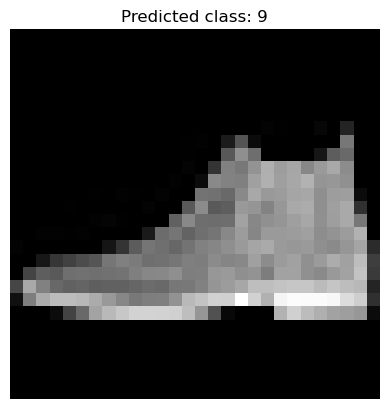

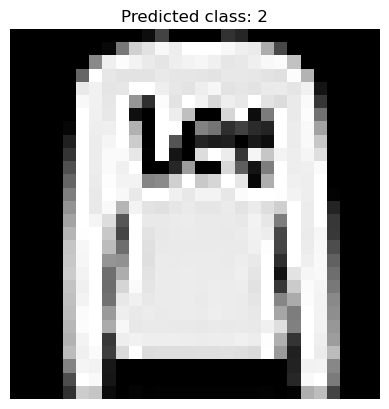

In [9]:
# Display the images and their predicted classes
for i in range(2):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted class: {predicted_classes[i]}')
    plt.axis('off')
    plt.show()